#**Recursive Feature Elimination**
Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm. RFE
is popular because it is easy to configure and use, and effective at selecting those
features (columns) in a training dataset that are more or most relevant in predicting the target
variable. There are two important configuration options when using RFE: the choice in the
number of features to select and the choice of the algorithm used to help choosing the features. Both
of these hyperparameters can be explored, although the performance of the method is not
strongly dependent on these hyperparameters being configured well.

In this tutorial, you will
discover how to use Recursive Feature Elimination (RFE) for feature selection in Python. After
completing this tutorial, you will know:
* RFE is an efficient approach for eliminating features from a training dataset for feature
selection.
* How to use RFE for feature selection for classification and regression predictive modeling
problems.
* How to explore the number of selected features and wrapped algorithm used by the RFE
procedure.

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

##RFE for Classification

First, we can use the
**make_classification**() function to create a synthetic binary classification problem with 1,000
examples and 10 input features, five of which are informative and five of which are redundant.

Next, we can evaluate an RFE feature selection algorithm on this dataset. We will use a
**DecisionTreeClassifier** to choose features and set the number of features to five. We will
then fit a new DecisionTreeClassifier model on the selected features. We will evaluate the
model using repeated stratified k-fold cross-validation, with three repeats and 10 folds. We will
report the mean and standard deviation of the accuracy of the model across all repeats and
folds.

In [3]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# Generate a random n-class classification problem.
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.031)


In this case, we can see the RFE that uses a decision tree and selects five features and
then fits a decision tree on the selected features achieves a classification accuracy of about 88
percent.

We can also use the RFE model pipeline as a final model and make predictions for classification. First, the RFE and model are fit on all available data, then the predict() function can
be called to make predictions on new data.

In [4]:
# make a prediction with an RFE pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,
-2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


##RFE for Regression
Next, we will look at using RFE for a regression problem. First, we can use the
**make_regression**() function to create a synthetic regression problem with 1,000 examples and
10 input features, five of which are important and five of which are redundant.

In [9]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
# Generate a random regression problem.
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# All scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
# are available as neg_mean_squared_error which return the negated value of the metric.
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.373 (2.966)


In this case, we can see the RFE pipeline with a decision tree model achieves a MAE of
about 27.

We can also use the RFE as part of the final model and make predictions for regression.
First, the Pipeline is fit on all available data, then the predict() function can be called to
make predictions on new data.

In [10]:
# make a regression prediction with an RFE pipeline
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,
0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


##RFE Hyperparameters

In this section, we will take a closer look at some of the hyperparameters you should consider
tuning for the RFE method for feature selection and their effect on model performance.

###Explore Number of Features
An important hyperparameter for the RFE algorithm is the number of features to select. In
the previous section, we used an arbitrary number of selected features, five, which matches
the number of informative features in the synthetic dataset. In practice, we cannot know the
best number of features to select with RFE; instead, it is good practice to test different values.

In [11]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
  random_state=1)
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(2, 10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
  
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>2 0.717 (0.046)
>3 0.827 (0.031)
>4 0.872 (0.031)
>5 0.884 (0.033)
>6 0.891 (0.027)
>7 0.887 (0.028)
>8 0.884 (0.028)
>9 0.887 (0.027)


In this case, we can see that performance improves as the number of features increase and
perhaps peaks around 4-to-7 as we might expect, given that only  five features are relevant to
the target variable.

A box and whisker plot is created for the distribution of accuracy scores for each con gured
number of features.

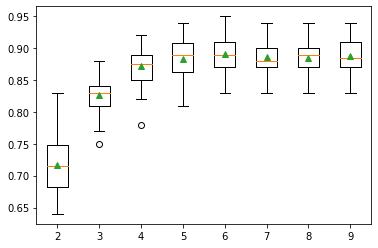

In [12]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###Automatically Select the Number of Features

It is also possible to automatically select the number of features chosen by RFE. This can be
achieved by performing cross-validation evaluation of different numbers of features as we did in
the previous section and automatically selecting the number of features that resulted in the
best mean score. The **RFECV** class implements this.

In [14]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
# Recursive feature elimination with cross-validation to select the number of features.
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.882 (0.024)


In this case, we can see the RFE that uses a decision tree and automatically selects a number
of features and then fits a decision tree on the selected features achieves a classification accuracy
of about 88 percent.

###Which Features Were Selected
When using RFE, we may be interested to know which features were selected and which were
removed. This can be achieved by reviewing the attributes of the  fit **RFE** object (or  fit **RFECV**
object). The support attribute reports true or false as to which features in order of column
index were included and the ranking attribute reports the relative ranking of features in the
same order. The example below fits an RFE model on the whole dataset and selects five features,
then reports each feature column index (0 to 9), whether it was selected or not (True or False),
and the relative feature ranking.

In [15]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define RFE
# Feature ranking with recursive feature elimination.
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 3
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 2


###Explore Estimator Algorithm
There are many algorithms that can be used in the core RFE, as long as they provide some
indication of variable importance. Most decision tree algorithms are likely to report the same
general trends in feature importance, but this is not guaranteed. It might be helpful to explore
the use of different algorithms wrapped by RFE. The example below demonstrates how you
might explore this configuration option.

In [17]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
  random_state=1)
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()

  # lr - LogisticRegression
  # estimator - A supervised learning estimator with a fit method that provides information about feature importance
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
  # per - Perceptron
  rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
  # dtc - DecisionTreeClassifier
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['dtc'] = Pipeline(steps=[('s',rfe),('m',model)])
  # rf - RandomForestClassifier
  rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
  # gbm - GradientBoostingClassifier
  rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.889 (0.032)
>per 0.847 (0.039)
>dtc 0.882 (0.030)
>rf 0.852 (0.042)
>gbm 0.888 (0.031)


In this case, the results suggest that linear algorithms like logistic regression might select better features more reliably than the chosen decision tree and ensemble
of decision tree algorithms.

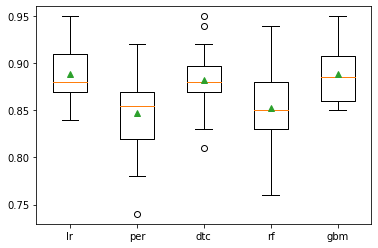

In [18]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

A box and whisker plot is created for the distribution of accuracy scores for each configured
wrapped algorithm. We can see the general trend of good performance with logistic regression,
DTC and perhaps GBM. The model used within RFE can make an important
difference to which features are selected and in turn the performance on the prediction problem.